In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.datasets import make_moons

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
n_samples = 1000
random_st = 42

dataset = make_moons(n_samples=n_samples,shuffle=True, noise = 0.2 , random_state =random_st)

In [ ]:
dataset

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        ...,
        [ 1.72760808, -0.42882943],
        [-1.01448644,  0.13522904],
        [ 0.77438101,  0.63428493]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

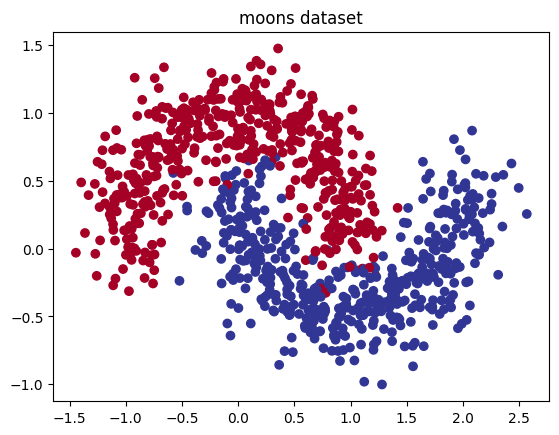

In [ ]:
%matplotlib inline
plt.title("moons dataset")
plt.scatter(dataset[0][:,0],dataset[0][:,1],c=dataset[1],cmap = plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[0],dataset[1],test_size=0.2,random_state=random_st)

In [ ]:
X_train.shape, y_train.shape

((800, 2), (800,))

In [ ]:
class moon_maker(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer = nn.Sequential(
        nn.Linear(in_features=2,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=1),
        nn.Sigmoid()
    )

  def forward(self,x):
    return self.layer(x)


In [ ]:
model = moon_maker().to(device)

In [ ]:
loss_func = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(params=model.parameters(),lr=0.01)

In [ ]:
model.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[-0.6536, -0.5876],
                      [ 0.0580,  0.6664],
                      [ 0.3112,  0.3512],
                      [ 0.5079,  0.1377],
                      [ 0.0897,  0.4530],
                      [ 0.6242, -0.1202],
                      [-0.5380, -0.6913],
                      [-0.1523,  0.4195],
                      [ 0.4934,  0.1199],
                      [ 0.4057, -0.0649]], device='cuda:0')),
             ('layer.0.bias',
              tensor([ 0.0068, -0.5774, -0.3278,  0.5019, -0.6181, -0.3334, -0.4358,  0.3294,
                       0.5918,  0.1659], device='cuda:0')),
             ('layer.2.weight',
              tensor([[ 0.1542,  0.2816,  0.1837,  ..., -0.2982,  0.1838,  0.2016],
                      [-0.1839,  0.2877,  0.2162,  ..., -0.2959, -0.0775, -0.1140],
                      [ 0.2368,  0.1413,  0.3070,  ...,  0.0527,  0.2214,  0.1755],
                      ...,
                      [-0.0852, -

In [ ]:
X_train , y_train = torch.from_numpy(X_train).float().to(device), torch.from_numpy(y_train).float().to(device)
X_test , y_test = torch.from_numpy(X_test).float().to(device), torch.from_numpy(y_test).float().to(device)

In [ ]:
X_train.device

device(type='cuda', index=0)

In [ ]:
epochs = 5


for epoch in range(epochs):

  model.train()
  y_pred = model(X_train)

print(y_pred.shape,y_train.shape)

torch.Size([800, 1]) torch.Size([800])


In [ ]:
y_pred[:3] ,y_train[:3]

(tensor([[0.5384],
         [0.5183],
         [0.5164]], device='cuda:0', grad_fn=<SliceBackward0>),
 tensor([1., 0., 0.], device='cuda:0'))

In [ ]:
epochs1 = 1000

for epoch in range(epochs1):
    model.train()
    y_logits = model(X_train)
    y_pred1 = torch.round(y_logits)

    # Use logits for loss
    loss = loss_func(y_logits, y_train.unsqueeze(dim=1))
    acc = (y_pred1 == y_train.unsqueeze(dim=1)).sum().float()/len(y_train)

    optim.zero_grad()  # ✅ must call as a function
    loss.backward()
    optim.step()

    # Evaluation
    model.eval()
    with torch.inference_mode():
        ts_logits = model(X_test)
        ts_pred = torch.round(ts_logits)
        ts_loss = loss_func(ts_logits, y_test.unsqueeze(dim=1))
        ts_acc = (ts_pred == y_test.unsqueeze(dim=1)).sum().float()/len(y_test)

    if epoch % 100 == 0:
        print(f'epoch no : {epoch+1} | loss : {loss:.4f} | '
              f'Train accuracy: {acc:.2f} | Test loss : {ts_loss:.4f} | '
              f'Test accuracy : {ts_acc:.2f}')


epoch no : 1 | loss : 0.7252 | Train accuracy: 0.50 | Test loss : 0.7227 | Test accuracy : 0.50
epoch no : 101 | loss : 0.5178 | Train accuracy: 0.97 | Test loss : 0.5175 | Test accuracy : 0.96
epoch no : 201 | loss : 0.5158 | Train accuracy: 0.98 | Test loss : 0.5189 | Test accuracy : 0.96
epoch no : 301 | loss : 0.5143 | Train accuracy: 0.98 | Test loss : 0.5185 | Test accuracy : 0.96
epoch no : 401 | loss : 0.5139 | Train accuracy: 0.98 | Test loss : 0.5181 | Test accuracy : 0.96
epoch no : 501 | loss : 0.5136 | Train accuracy: 0.98 | Test loss : 0.5182 | Test accuracy : 0.96
epoch no : 601 | loss : 0.5134 | Train accuracy: 0.98 | Test loss : 0.5177 | Test accuracy : 0.96
epoch no : 701 | loss : 0.5132 | Train accuracy: 0.98 | Test loss : 0.5165 | Test accuracy : 0.97
epoch no : 801 | loss : 0.5131 | Train accuracy: 0.98 | Test loss : 0.5161 | Test accuracy : 0.97
epoch no : 901 | loss : 0.5131 | Train accuracy: 0.98 | Test loss : 0.5155 | Test accuracy : 0.97


In [ ]:
import requests
from pathlib import Path

In [ ]:
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


Text(0.5, 1.0, 'Test')

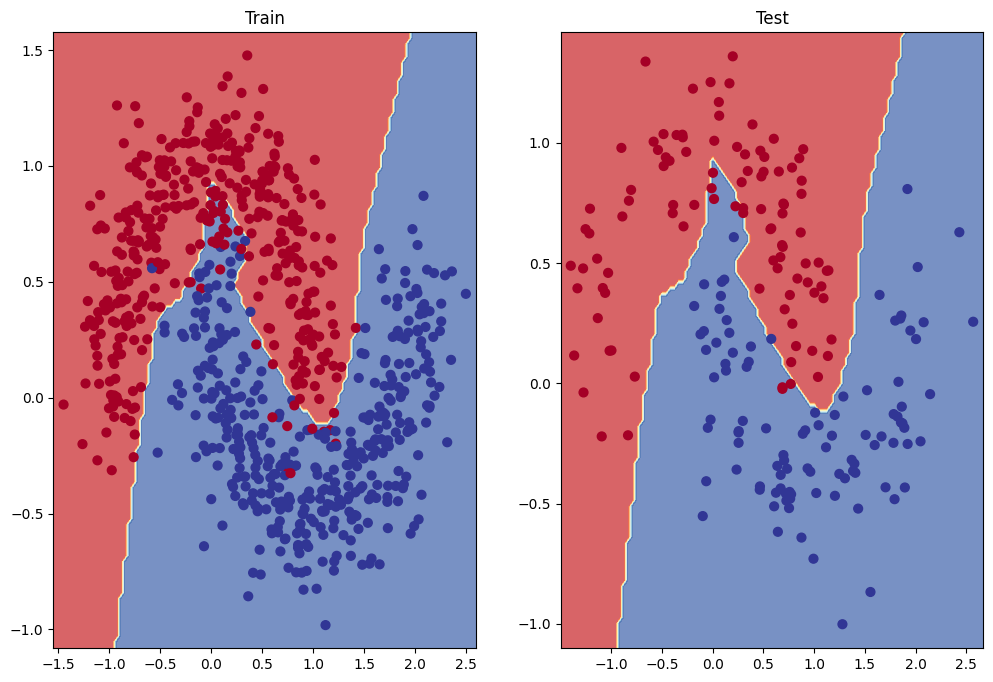

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model,X_test,y_test)
plt.title("Test")